In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Mondol007/Datasets/main/Buy%20Computer.csv")

In [ ]:
data

,Age,Education,Income,Marital Status,Buy Computer
0,36-55,Master's,High,Single,Yes
1,18-35,High School,Low,Single,No
2,36-55,Master's,Low,Single,Yes
3,18-35,Bachelor's,High,Single,No
4,<18,High School,Low,Single,Yes
5,18-35,Bachelor's,High,Married,No
6,36-55,Bachelor's,Low,Married,No
7,>55,Bachelor's,High,Single,Yes
8,36-55,Master's,Low,Married,No
9,>55,Master's,Low,Married,Yes


In [ ]:
data.describe()

,Age,Education,Income,Marital Status,Buy Computer
count,20,20,20,20,20
unique,4,3,2,2,2
top,36-55,Master's,High,Single,Yes
freq,8,7,10,12,12


In [ ]:
data.shape

(20, 5)

In [ ]:
data.columns

Index(['Age', 'Education', 'Income', 'Marital Status', 'Buy Computer'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
K = LabelEncoder()
L = LabelBinarizer()

In [ ]:
data['Age'] = K.fit_transform(data['Age'])
data['Age'].unique()

array([1, 0, 2, 3])

In [ ]:
data['Education'] = K.fit_transform(data['Education'])
data['Education'].unique()

array([2, 1, 0])

In [ ]:
data['Income'] = K.fit_transform(data['Income'])
data['Income'].unique()

array([0, 1])

In [ ]:
data['Marital Status'] = L.fit_transform(data['Marital Status'])
data['Marital Status'].unique()

array([1, 0])

In [ ]:
data['Buy Computer'] = L.fit_transform(data['Buy Computer'])
data['Buy Computer'].unique()

array([1, 0])

In [ ]:
data

,Age,Education,Income,Marital Status,Buy Computer
0,1,2,0,1,1
1,0,1,1,1,0
2,1,2,1,1,1
3,0,0,0,1,0
4,2,1,1,1,1
5,0,0,0,0,0
6,1,0,1,0,0
7,3,0,0,1,1
8,1,2,1,0,0
9,3,2,1,0,1


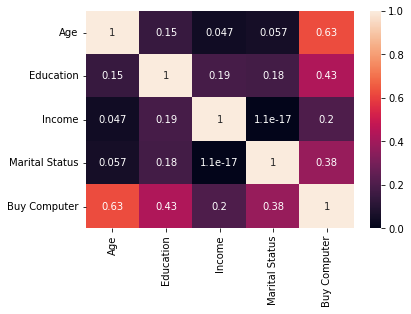

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True)

In [ ]:
X = data[['Age','Education', 'Income', 'Marital Status']]
Y = data['Buy Computer']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

From Scarch

In [ ]:
import numpy as np
import pandas as pd
import math

In [ ]:
def primaryData(dataset):
    index = list(dataset.columns)
    row_len = len(dataset)
    col_len = len(index)

    return index, row_len, col_len

In [ ]:
def find_entropy(dataset, index, row_len, col_len, col):
    DATA = {}
    class_item = set()
    attrr_item = set()

    for mKey, lKey in zip(dataset[index[col]].values, dataset[index[col_len - 1]].values):
        class_item.add(lKey)
        attrr_item.add(mKey)

        if mKey in DATA:
            DATA[mKey]['n'] += 1
            if lKey in DATA[mKey]:
                DATA[mKey][lKey] += 1
            else:
                DATA[mKey][lKey] = 1
        else:
            DATA[mKey] = {'n': 1, lKey: 1}
    totalDict = {}
    totalValue = 0
    for d in attrr_item:
        value = 0
        for s in class_item:
            if s in DATA[d]:
                v = DATA[d][s] / DATA[d]['n']
                value += (v * math.log(v, 2))
            else:
                value = 0
        totalDict[d] = -(value * (DATA[d]['n'] / row_len))
        totalValue += -(value * (DATA[d]['n'] / row_len))

    return totalDict, totalValue


In [ ]:
def allEntropy(dataset, index, row_len, col_len):
    _class = {}
    for idd in dataset[index[col_len - 1]].values:
        if idd in _class:
            _class[idd] += 1
        else:
            _class[idd] = 1
    _clsEntropy = 0
    for c in _class:
        val = _class[c] / row_len
        _clsEntropy += -(val * math.log(val, 2))
    _attrEntropy = {}
    _entropy = []
    for i in range(0, col_len - 1):
        _attrEntropy[index[i]], val = find_entropy(dataset, index, row_len, col_len, i)
        _entropy.append(val)
    _infoGain = []
    for i in range(0, col_len - 1):
        _infoGain.append(_clsEntropy - _entropy[i])

    return _attrEntropy, _entropy, _infoGain

In [ ]:
if __name__ == '__main__':
    data = pd.read_csv("https://raw.githubusercontent.com/Mondol007/Datasets/main/Buy%20Computer.csv")
    index, rowLength, colLength = primaryData(data)
    AttEntropy, Entropy, InformatioGain = allEntropy(dataset, index, rowLength, colLength)
    print(AttEntropy)

{'Age': {'36-55': 0.381773601169986, '18-35': -0.0, '>55': -0.0, '<18': 0.13774437510817342}, 'Education': {'High School': 0.34482984761198804, "Bachelor's": 0.27548875021634683, "Master's": 0.2070854725038146}, 'Income': {'Low': 0.44064544961534635, 'High': 0.5}, 'Marital Status': {'Single': 0.4867668746754797, 'Married': 0.381773601169986}}


End Scarch

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

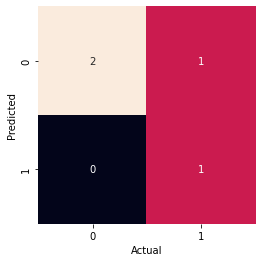

In [ ]:
import matplotlib.pyplot as plt
con_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75
